#### ____
<h1 align="center">OECD Analysis - Data Science</h1>
<h3 align="center">Guilherme Tamer Lotaif</h3>

<br>

### Introduction:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The objective of this project is to create a detailed exploratory analysis of different countries, which may or may not belong to a specific international organization. This analysis will be conducted using selected data from different years, extracted from the website www.gapminder.com.
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The chosen organization is the **OECD** (Organisation for Economic Co-operation and Development), which currently consists of 36 countries, the majority of which have developed economies. Additionally, they also exhibit a high level of HDI (Human Development Index). This intergovernmental economic organization was founded in 1961 with the purpose of promoting economic progress and global trade. Among its main objectives are the improvement of living standards, job development, and the maintenance of financial stability.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In addition to the assistance that the OECD provides to its members, it also shares it's knowledge with over 100 other countries and economies, including Brazil, Russia, China, and South Africa. These a'e considered partners of the organization.
<br><br>

### Guiding question:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Is it possible that OECD members experience a higher growth in their HDI and GDP per capita compared to countries that do not belong to the organization? Could potential growth be related to foreign investments?**
<br><br>

### Hypotheses:

- OECD member countries may not undergo a substantial change after joining the organization, considering that its guidelines are merely suggestions and, therefore, not mandatory, as mentioned in the article: [www.gresea.be](http://www.gresea.be/OECD-Guidelines-its-pros-and-cons) . With this lack of commitment, large companies can simply ignore OECD regulations, so the country's participation does not generate a significant change in per capita GDP growth, as well as in HDI.
<br><br>
- By joining the OECD, a country becomes more attractive to other members of the group due to the support provided by the organization, increasing the reliability of the country in question. Another factor that attracts the interest of other members is the fact that they share the same intentions and aspirations, as evidenced by the description found on the website: [worldpopulationreview.com](http://worldpopulationreview.com/countries/oecd-countries/). Therefore, we can assume that the occurrence of growth in both HDI and per capita GDP is likely.
<br><br>

___

### Libraries:

Let's import the libraries that will be necessary to perform our analyses:

In [1]:
#Importing libraries:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

plt.style.use('ggplot')
sns.set_palette("RdYlBu")

In [2]:
warnings.filterwarnings("ignore")

___
### 1. Import and cleaning of files

The databases selected for this project are:

- [HDI (Human Development Index)](https://docs.google.com/spreadsheet/pub?key=tyadrylIpQ1K_iHP407374Q)
- [GDP (Gross Domestic Product)](https://docs.google.com/spreadsheet/pub?key=0AkBd6lyS3EmpdHo5S0J6ekhVOF9QaVhod05QSGV4T3c)
- [Foreign investment](https://docs.google.com/spreadsheets/d/1dHWaMTB9h7rdFI3DLZ3Pgpur2l3p2hgz93THK2oB8Jc/pub)

#### Description:


**HDI**: The Human Development Index is used as a tool for comparison between countries. This index is measured through the following indicators: Average years of education (education), life expectancy of the population (longevity), and Gross Domestic Product per capita. The annual HDI report is produced by the United Nations Development Programme, which is an agency of the United Nations.
<br><br>
**GDP**: The Gross Domestic Product is the monetary value of all final goods and services produced in a region during a specified period. GDP is one of the most commonly used indicators in macroeconomics and is measured through three perspectives: expenditure, output, and income.
<br><br>
**Foreign Investment**: This occurs when a company or an individual from one nation invests in stocks or assets of another nation. Having foreign investments in a country is a positive sign, as it is often associated with job growth and increased wages. It is also a strong indicator that the economy of that nation is stable.

<br>

In [3]:
#Importing the files of basic indicators:
HDI = pd.read_excel('Data/Indicator_HDI.xlsx')
GDP = pd.read_excel('Data/Indicator GDP at market prices.xlsx')

#Importing the investment file:
Foreign_investment = pd.read_excel("Data/Foreign direct investment.xlsx")

...

#### 1.1 Selecting the years we will analyze:<br>
For a more accurate study, we need to compare data from more than a single year. In this case, we will analyze data from the years **`1980`**,**`1990`**, **`2000`**, **`2009`** in different countries. Additionally, we need to change the index of each imported dataset to make our final dataframe cleaner.

In [4]:
#Selecting the year we will analyze for basic indicators:
HDI_years = HDI.loc[:, ["HDI",1980,1990,2000, 2009]]
GDP_years = GDP.loc[:, ["GDP (constant 2000 US$)",1980,1990,2000, 2009]]

#Selecting the year we will analyze from the investment file:
Foreign_investment_years = Foreign_investment.loc[:, ["country",1980,1990,2000, 2009]]

...

####  Adding a column to the dataframe to indicate membership in the organization:

This column will enable comparisons between countries inside and outside the organization, allowing us to analyze the difference it made for countries that became members during this period.

In [6]:
#Creating a list of countries that are currently members of the OECD:
OECD_Countries = ["Australia","Austria","Belgium","Canada","Chile","Czech Republic","Denmark","Estonia","Finland",
               "France","Germany","Greece","Hungary","Iceland","Ireland","Israel","Italy","Japan","South Korea",
               "Latvia","Lithuania","Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland","Portugal",
               "Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey","United Kingdom","United States"]

In [7]:
#Using the list of countries to define the members in our new column:
for i in OECD_Countries:
        HDI_years.loc[(HDI_years.iloc[:,0] == i), 'OECD'] = 'IN'
        GDP_years.loc[(GDP_years.iloc[:,0] == i), 'OECD'] = 'IN'
        Foreign_investment_years.loc[(Foreign_investment_years.iloc[:,0] == i), 'OECD'] = 'IN'

In [8]:
#Setting NaN values as countries that do not belong to the organization:
HDI_years_oecd = HDI_years.iloc[:,-1].replace(np.nan, 'OUT', regex=True)
GDP_years_oecd = GDP_years.iloc[:,-1].replace(np.nan, 'OUT', regex=True)
Foreign_investment_years_oecd = Foreign_investment_years.iloc[:,-1].replace(np.nan, 'OUT', regex=True)

In [9]:
#Merging the new column:
#Removing the column created for membership definition:
HDI_years = HDI_years.join(HDI_years_oecd.to_frame(), how='inner', lsuffix='_DELETE')
HDI_years = HDI_years.drop(['OECD_DELETE'], axis=1)

GDP_years = GDP_years.join(GDP_years_oecd.to_frame(), how='inner', lsuffix='_DELETE')
GDP_years = GDP_years.drop(['OECD_DELETE'], axis=1)

Foreign_investment_years = Foreign_investment_years.join(Foreign_investment_years_oecd.to_frame(), how='inner', lsuffix='_DELETE')
Foreign_investment_years = Foreign_investment_years.drop(['OECD_DELETE'], axis=1)

In [10]:
#Let's plot an example of one of our dataframes:
HDI_years.sample()

,HDI,1980,1990,2000,2009,OECD
97,Honduras,0.451,0.513,0.569,0.619,OUT


...

#### 1.2 Creating a dataframe for each year:<br>
From the individual datasets with country information for different years, a dataframe will be created to allow us to perform exploratory analysis and thereby answer the question posed at the beginning of the project.

In [11]:
#Merging all datasets from 1980 into one dataframe:
df_1980 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:, 1].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_1980 = df_1980.join(GDP_years.iloc[:,1].to_frame(), how='inner', lsuffix='_GDP')
df_1980 = df_1980.join(Foreign_investment_years.iloc[:, 1].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [12]:
#Merging all datasets from 1990 into one dataframe:
df_1990 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:, 2].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_1990 = df_1990.join(GDP_years.iloc[:,2].to_frame(), how='inner', lsuffix='_GDP')
df_1990 = df_1990.join(Foreign_investment_years.iloc[:, 2].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [13]:
#Merging all datasets from 2000 into one dataframe:
df_2000 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:,3].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_2000 = df_2000.join(GDP_years.iloc[:,3].to_frame(), how='inner', rsuffix='_GDP')
df_2000 = df_2000.join(Foreign_investment_years.iloc[:, 3].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [14]:
#Merging all datasets from 2009 into one dataframe:
df_2009 = HDI_years.iloc[:, 0].to_frame().join(HDI_years.iloc[:,4].to_frame(), how='inner', lsuffix='PAÍSES', rsuffix='_GDP')
df_2009 = df_2009.join(GDP_years.iloc[:, 4].to_frame(), how='inner', lsuffix='_GDP')
df_2009 = df_2009.join(Foreign_investment_years.iloc[:, 4].to_frame(), how='inner', lsuffix='FOREIGN INVESTMENT')

In [15]:
#Renaming the columns of the dataframes with the appropriate names:
df_1980.columns, df_1990.columns ,df_2000.columns, df_2009.columns = ["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"
                                                                   ],["PAÍSES","HDI","GDP","FOREIGN INVESTMENT"]

...

#### 1.2.1 Adding a column to the dataframe to indicate membership in the organization:

This step is crucial for us to make proper comparisons between different groups of countries and the `OECD` members.

In [19]:
#Using the list of countries to define the members in our new column:
for i in OECD_Countries:
        df_1980.loc[(df_1980.iloc[:,0] == i), 'OECD'] = 'IN'
        df_1990.loc[(df_1990.iloc[:,0] == i), 'OECD'] = 'IN'
        df_2000.loc[(df_2000.iloc[:,0] == i), 'OECD'] = 'IN'
        df_2009.loc[(df_2009.iloc[:,0] == i), 'OECD'] = 'IN'

In [20]:
#Setting NaN values as countries that do not belong to the organization:
df_1980_oecd = df_1980.iloc[:,-1].replace(np.nan, 'OUT', regex=True)
df_1990_oecd = df_1990.iloc[:,-1].replace(np.nan, 'OUT', regex=True)
df_2000_oecd = df_2000.iloc[:,-1].replace(np.nan, 'OUT', regex=True)
df_2009_oecd = df_2009.iloc[:,-1].replace(np.nan, 'OUT', regex=True)

In [21]:
#Merging the new column:
#Removing the column created for membership definition:
df_1980 = df_1980.join(df_1980_oecd.to_frame(), how='inner', lsuffix='_DELETE')
df_1980 = df_1980.drop(['OECD_DELETE'], axis=1)

df_1990 = df_1990.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETE')
df_1990 = df_1990.drop(['OECD_DELETE'], axis=1)

df_2000 = df_2000.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETE')
df_2000 = df_2000.drop(['OECD_DELETE'], axis=1)

df_2009 = df_2009.join(df_1990_oecd.to_frame(), how='inner', lsuffix='_DELETE')
df_2009 = df_2009.drop(['OECD_DELETE'], axis=1)

In [22]:
#Let's plot an example of one of our dataframes:
df_1980.sample(2)

,PAÍSES,HDI,GDP,FOREIGN INVESTMENT,OECD
182,Qatar,0.703,NaN,4.09,OUT
60,Djibouti,NaN,NaN,NaN,OUT


<br>

___

### 2. Exploratory Analysis:

In order to compare the development of countries outside the OECD with those belonging to the organization, it is necessary to declare which countries belong to which group to be evaluated. Therefore, let's first separate our initial dataframe into two.

In [26]:
#Creating a dataframe with the HDI data obtained from the countries within the Organization:
HDI_in = HDI_years.drop(HDI_years.loc[HDI_years['OECD']== "OUT"].index)

In [27]:
#Creating a dataframe with the HDI data obtained from countries outside the Organization:
HDI_out = HDI_years.drop(HDI_years.loc[HDI_years['OECD']== "IN"].index)

...

#### 2.1 Study of HDI distributions:


<br>

Let's start this analysis with histograms for each year, isolating the countries that are part of the OECD. To proceed, we first need to determine the range that our data uses, so let's find out the class width:

In [28]:
#Determining the class width for countries outside the organization:
n = np.sqrt(len(HDI_years.iloc[:,1]))
width = (HDI_years.iloc[:,4].max() - HDI_years.iloc[:,1].min())/n
print('Class width: {:.3f}'.format(width))

Class width: 0.047


In [29]:
#Determining the range to plot the graphs:
#Using a class width equal to 0.5:
faixa = np.arange(HDI_years.iloc[:,1].min(), HDI_years.iloc[:,4].max(), width)

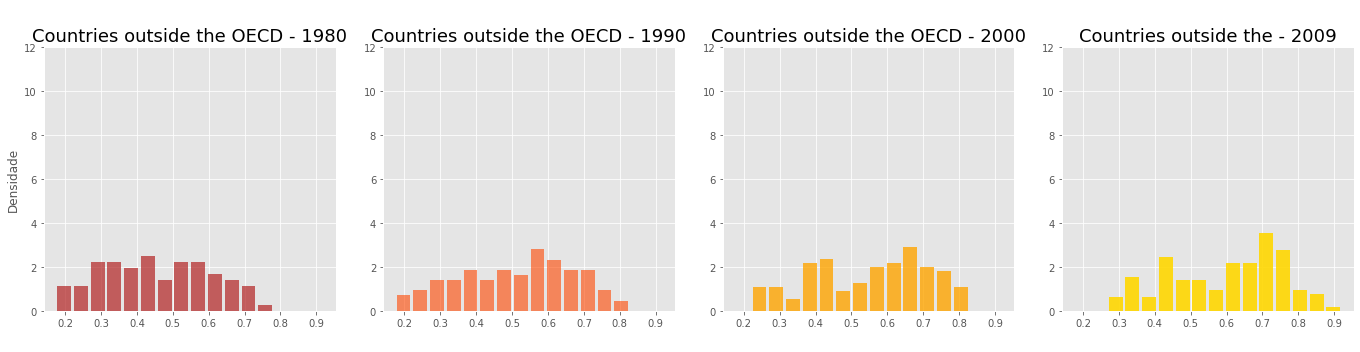

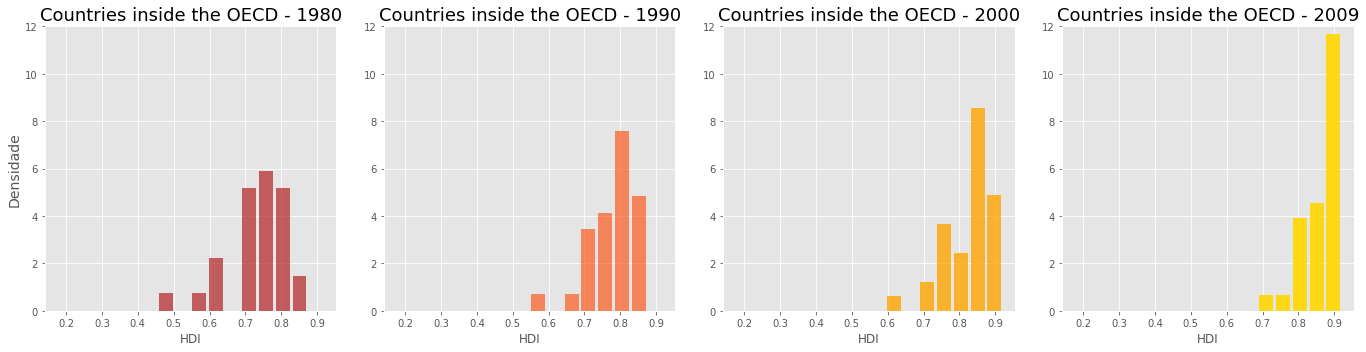

In [30]:
#Let's plot histograms of HDI for countries over time:
fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
HDI_11 = HDI_out.iloc[:,1].plot.hist(bins = faixa, density = True, color ='firebrick', alpha =0.7, rwidth =0.83)
plt.title("\nCountries outside the OECD - 1980",size=18)
plt.ylabel('Densidade')
plt.xlabel(' ')
HDI_11.set(ylim=(0,12))

plt.subplot(142)
HDI_12 = HDI_out.iloc[:,2].plot.hist(bins = faixa, density = True, color ='orangered', alpha =0.6, rwidth =0.83)
plt.title("\nCountries outside the OECD - 1990",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_12.set(ylim=(0,12))

plt.subplot(143)
HDI_13 = HDI_out.iloc[:,3].plot.hist(bins = faixa, density = True, color ='orange', alpha =0.8, rwidth =0.83) 
plt.title("\nCountries outside the OECD - 2000",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_13.set(ylim=(0,12))

plt.subplot(144)
HDI_14 = HDI_out.iloc[:,4].plot.hist(bins = faixa, density = True, color ='gold', alpha =0.9, rwidth =0.83)
plt.title("\nCountries outside the - 2009",size=18)
plt.ylabel(' ')
plt.xlabel(' ')
HDI_14.set(ylim=(0,12))
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
HDI_21 = HDI_in.iloc[:,1].plot.hist(bins = faixa, density = True, color ='firebrick', alpha =0.7, rwidth =0.83)
plt.title("Countries inside the OECD - 1980",size=18)
plt.ylabel('Densidade',size=14)
plt.xlabel('HDI')
HDI_21.set(ylim=(0,12))

plt.subplot(142)
HDI_22 = HDI_in.iloc[:,2].plot.hist(bins = faixa, density = True, color ='orangered', alpha =0.6, rwidth =0.83)
plt.title("Countries inside the OECD - 1990",size=18)
plt.ylabel(' ')
plt.xlabel('HDI')
HDI_22.set(ylim=(0,12))

plt.subplot(143)
HDI_23 = HDI_in.iloc[:,3].plot.hist(bins = faixa, density = True, color ='orange', alpha =0.8, rwidth =0.83) 
plt.title("Countries inside the OECD - 2000",size=18)
plt.ylabel(' ')
plt.xlabel('HDI')
HDI_23.set(ylim=(0,12))

plt.subplot(144)
HDI_24 = HDI_in.iloc[:,4].plot.hist(bins = faixa, density = True, color ='gold', alpha =0.9, rwidth =0.83)
plt.title("Countries inside the OECD - 2009",size=18)
plt.ylabel(' ')
plt.xlabel('HDI')
HDI_24.set(ylim=(0,12))
plt.tight_layout()
plt.show()

We can observe that among the analyzed countries, those belonging to the **OECD** have a left-skewed distribution and a high density of countries with a higher HDI. On the other hand, countries that are not part of the organization have a distribution with greater dispersion, so there is a large number of countries distributed from a very low HDI to a high one.

<br>

...

#### Let's check these data in a more organized and clear way:

<br>
In this part, we will use specific measures from each year of the dataframes to enrich our study. Additionally, we will separate the countries that belong to the organization and those that do not. The measures include: The mean value; The median value; The standard deviation value; The maximum value; and also the minimum value.

In [31]:
#Creating a list with the values of the number of countries in each year:
HDI_Count = ["Number of countries","{:.2f}".format(HDI_out.iloc[:,1].count()),"{:.2f}".format(HDI_out.iloc[:,2].count()),
               "{:.2f}".format(HDI_out.iloc[:,3].count()),"{:.2f}".format(HDI_out.iloc[:,4].count()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].count()),"{:.2f}".format(HDI_in.iloc[:,2].count()),
               "{:.2f}".format(HDI_in.iloc[:,3].count()),"{:.2f}".format(HDI_in.iloc[:,4].count())]

#Creating a list with the mean values for each year:
HDI_Average = ["Mean","{:.2f}".format(HDI_out.iloc[:,1].mean()),"{:.2f}".format(HDI_out.iloc[:,2].mean()),
               "{:.2f}".format(HDI_out.iloc[:,3].mean()),"{:.2f}".format(HDI_out.iloc[:,4].mean()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].mean()),"{:.2f}".format(HDI_in.iloc[:,2].mean()),
               "{:.2f}".format(HDI_in.iloc[:,3].mean()),"{:.2f}".format(HDI_in.iloc[:,4].mean())]
#Creating a list with the median values for each year:
HDI_Median = ["Median","{:.2f}".format(HDI_out.iloc[:,1].median()),"{:.2f}".format(HDI_out.iloc[:,2].median()),
              "{:.2f}".format(HDI_out.iloc[:,3].median()),"{:.2f}".format(HDI_out.iloc[:,4].median()),"","|","",
              "{:.2f}".format(HDI_in.iloc[:,1].median()),"{:.2f}".format(HDI_in.iloc[:,2].median()),
              "{:.2f}".format(HDI_in.iloc[:,3].median()),"{:.2f}".format(HDI_in.iloc[:,4].median())]
#Creating a list with the Standard deviation values for each year:
HDI_SD = ["Standard deviation","{:.2f}".format(HDI_out.iloc[:,1].std()),"{:.2f}".format(HDI_out.iloc[:,2].std()),
               "{:.2f}".format(HDI_out.iloc[:,3].std()),"{:.2f}".format(HDI_out.iloc[:,4].std()),"","|","",
               "{:.2f}".format(HDI_in.iloc[:,1].std()),"{:.2f}".format(HDI_in.iloc[:,2].std()),
               "{:.2f}".format(HDI_in.iloc[:,3].std()),"{:.2f}".format(HDI_in.iloc[:,4].std())]
#Creating a list with the minimum values for each year:
HDI_Min = ["Mínimum","{:.2f}".format(HDI_out.iloc[:,1].min()),"{:.2f}".format(HDI_out.iloc[:,2].min()),
              "{:.2f}".format(HDI_out.iloc[:,3].min()),"{:.2f}".format(HDI_out.iloc[:,4].min()),"","|",
              "","{:.2f}".format(HDI_in.iloc[:,1].min()),"{:.2f}".format(HDI_in.iloc[:,2].min()),
              "{:.2f}".format(HDI_in.iloc[:,3].min()),"{:.2f}".format(HDI_in.iloc[:,4].min())]
#Creating a list with the maximum values for each year:
HDI_Max = ["Máximum","{:.2f}".format(HDI_out.iloc[:,1].max()),"{:.2f}".format(HDI_out.iloc[:,2].max()),
              "{:.2f}".format(HDI_out.iloc[:,3].max()),"{:.2f}".format(HDI_out.iloc[:,4].max()),"","|",
              "","{:.2f}".format(HDI_in.iloc[:,1].max()),"{:.2f}".format(HDI_in.iloc[:,2].max()),
              "{:.2f}".format(HDI_in.iloc[:,3].max()),"{:.2f}".format(HDI_in.iloc[:,4].max())]

In [32]:
#Assigning values to the list with all the data:
data_hdi = [HDI_Count,HDI_Average,HDI_Median,HDI_SD,HDI_Min,HDI_Max]
#Transforming our list into a dataframe and assigning column names:
data_hdi_1 = pd.DataFrame(data_hdi, columns=["HDI","OUT_1980","OUT_1990","OUT_2000","OUT_2009","","|",
                                    "", "MEMBER_1990","MEMBER_1990","MEMBER_2000","MEMBER_2009"])
#Changing the index to HDI:
data_hdi_2 = data_hdi_1.set_index('HDI')
#Plotting the dataframe:
data_hdi_2

,OUT_1980,OUT_1990,OUT_2000,OUT_2009,,|,,MEMBER_1990,MEMBER_1990,MEMBER_2000,MEMBER_2009
HDI,,,,,,,,,,,
Number of countries,77.00,92.00,118.00,139.00,,|,,29.00,31.00,35.00,35.00
Mean,0.46,0.51,0.55,0.60,,|,,0.73,0.78,0.83,0.86
Median,0.45,0.54,0.58,0.64,,|,,0.74,0.79,0.84,0.88
Standard deviation,0.15,0.16,0.16,0.16,,|,,0.08,0.07,0.06,0.05
Mínimum,0.17,0.19,0.22,0.28,,|,,0.46,0.56,0.63,0.69
Máximum,0.75,0.79,0.82,0.89,,|,,0.85,0.87,0.91,0.94


<br>

From the data in the table, we can see that the growth is somewhat similar for both groups. However, as the standard deviation decreases in member countries, a trend that is not replicated in the others, we can conclude that there is superior development in the analyzed years in the group belonging to the organization.

...

#### Let's analyze the data from the years in boxplot graphs:

<br>
This type of analysis is useful for determining the dispersion, symmetry, tails, and outliers of the data set.

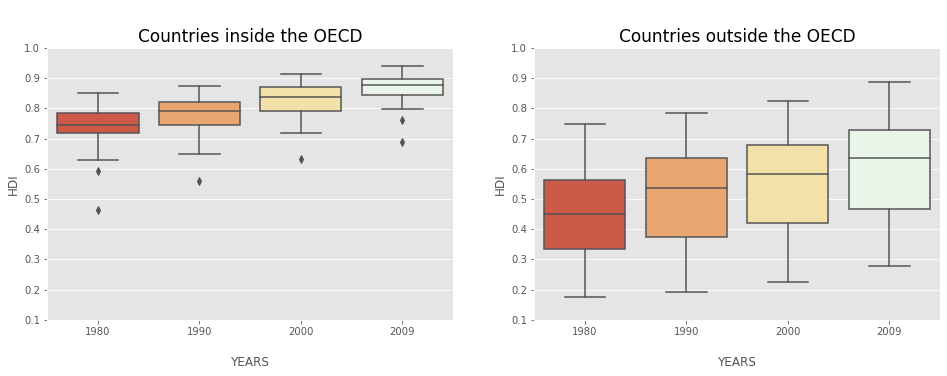

In [33]:
#Let's set the size of the figures:
fig = plt.figure(figsize=(16, 5))
plt.subplot(121)
#Providing the dataframe we will use for the Boxplot:
ax_hdi = sns.boxplot(data = HDI_in)
#Providing the characteristics of the graph:
plt.title("\nCountries inside the OECD",size=17)
plt.ylabel('HDI')
plt.xlabel('\nYEARS')
ax_hdi.set(ylim=(0.1,1))

plt.subplot(122)
#Providing the dataframe we will use for the Boxplot:
ax_hdi_1 = sns.boxplot(data = HDI_out)
#Providing the characteristics of the graph:
plt.title("\nCountries outside the OECD",size=17)
plt.ylabel('HDI')
plt.xlabel('\nYEARS')
ax_hdi_1.set(ylim=(0.1,1))
plt.show()

Analyzing the data provided by these boxplot graphs, it is possible to see that both groups had significant growth in the studied period. However, we can observe that while the group of **OECD** members has its minimum HDI increased by almost 20%, while the countries outside of the group have their minimum increased by approximately 10%


___

...

#### 2.2 Analyzing the GDP growth:

In order to compare the GDP growth of countries outside the OECD with those belonging to the organization, it is necessary to declare which countries belong to which group to be evaluated. Therefore, let's first separate our initial dataframe into two.

In [34]:
#Creating a dataframe with the GDP data obtained from countries within the Organization:
GDP_in = GDP_years.drop(GDP_years.loc[GDP_years['OECD']== "OUT"].index)

In [35]:
#Creating a dataframe with the GDP data obtained from countries outside the Organization:
GDP_out = GDP_years.drop(GDP_years.loc[GDP_years['OECD']== "IN"].index)



<br>

#### Study of GDP distributions:
<br>

Let's start this analysis with histograms for each year, isolating the countries that are part of the OECD, and this time we will use the seaborn library to assist us in our study, we don't need to determine the data range, as it is done automatically.

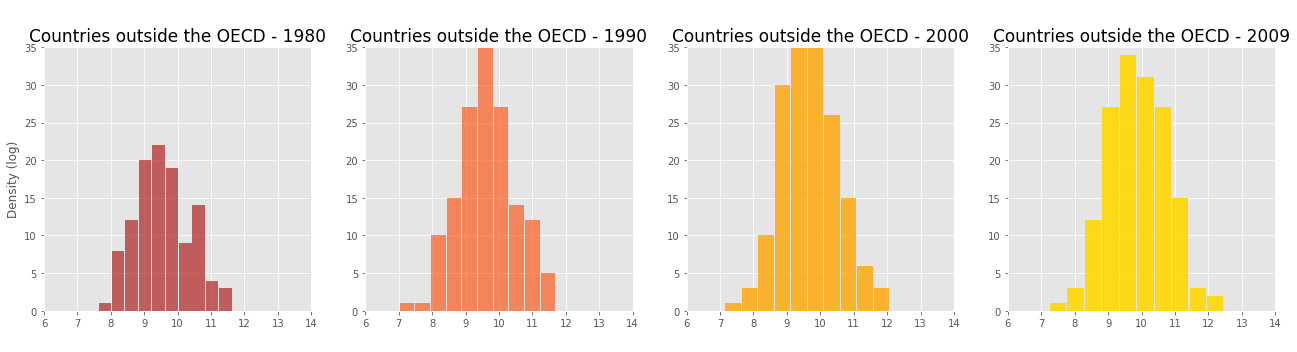

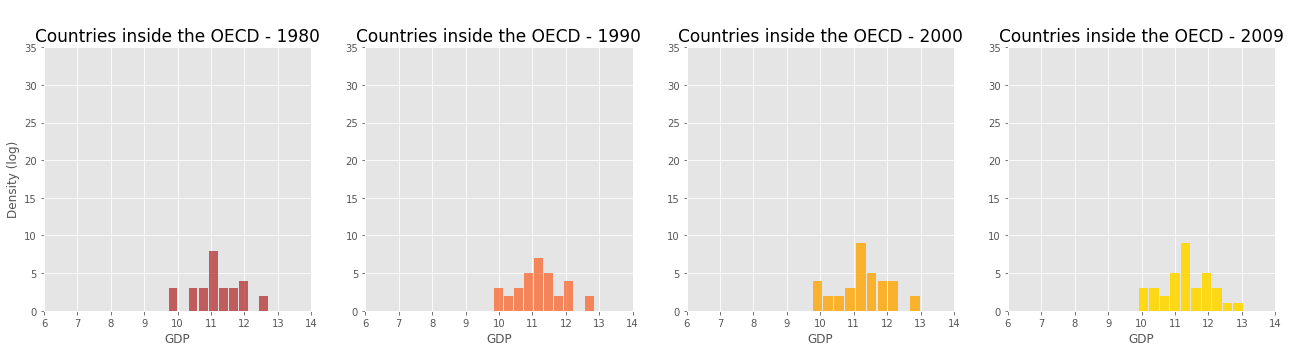

In [37]:
#Let's plot histograms of GDP for countries over time:
fig = plt.figure(figsize=(18, 5))
plt.subplot(141)
GDP11 = sns.distplot(np.log10(GDP_out.iloc[:,1]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                            "alpha": 0.7, "color": "firebrick", "rwidth" :0.93});
plt.title("\nCountries outside the OECD - 1980",size=17)
plt.ylabel('Density (log)')
plt.xlabel(' ')
GDP11.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(142)
GDP12 = sns.distplot(np.log10(GDP_out.iloc[:,2]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                    "alpha": 0.6, "color": "orangered", "rwidth" :0.93});
plt.title("\nCountries outside the OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP12.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(143)
GDP13 = sns.distplot(np.log10(GDP_out.iloc[:,3]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                       "alpha": 0.8, "color": "orange", "rwidth" :0.93});
plt.title("\nCountries outside the OECD - 2000",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP13.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(144)
GDP14 = sns.distplot(np.log10(GDP_out.iloc[:,4]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                         "alpha": 0.9, "color": "gold", "rwidth" :0.93});
plt.title("\nCountries outside the OECD - 2009",size=17)
plt.ylabel(' ')
plt.xlabel(' ')
GDP14.set(xlim=(6, 14),ylim=(0,35))
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(18, 5))
plt.subplot(141)
GDP21 = sns.distplot(np.log10(GDP_in.iloc[:,1]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                   "alpha": 0.7, "color": "firebrick", "rwidth" :0.88});
plt.title("\nCountries inside the OECD - 1980",size=17)
plt.ylabel('Density (log)')
plt.xlabel('GDP')
GDP21.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(142)
GDP22 = sns.distplot(np.log10(GDP_in.iloc[:,2]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                   "alpha": 0.6, "color": "orangered", "rwidth" :0.88});
plt.title("\nCountries inside the OECD - 1990",size=17)
plt.ylabel(' ')
plt.xlabel('GDP')
GDP22.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(143)
GDP23 = sns.distplot(np.log10(GDP_in.iloc[:,3]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                       "alpha": 0.8, "color": "orange", "rwidth" :0.9});
plt.title("\nCountries inside the OECD - 2000",size=17)
plt.ylabel(' ')
plt.xlabel('GDP')
GDP23.set(xlim=(6, 14),ylim=(0,35))

plt.subplot(144)
GDP24 = sns.distplot(np.log10(GDP_in.iloc[:,4]).dropna(),kde=False, bins = 10, hist_kws={"linewidth": 3,
                                                         "alpha": 0.9, "color": "gold", "rwidth" :0.9});
plt.title("\nCountries inside the OECD - 2009",size=17)
plt.ylabel(' ')
plt.xlabel('GDP')
GDP24.set(xlim=(6, 14),ylim=(0,35))
plt.tight_layout()
plt.show()

From the comparison of the histograms, we can identify that countries outside the **OECD** not only have a slightly improve their GDP, but the distribution also shows an improvement: from slightly right-skewed to a distribution that approaches normal. On the other hand, countries that are part of the **OECD** do not show a substantial change in distribution, but they still manage to improve their Gross Domestic Product.

...

#### Let's check these data in a more organized and clear way:

<br>
Again, let's use specific measures from each year of the dataframes to enrich our study. Remembering the  measures: The mean value; The median value; The standard deviation value; The maximum value; and also the minimum value.

In [38]:
#Creating a list with the values of the number of countries in each year:
GDP_Count = ["Number of countries","{:.2f}".format(GDP_out.iloc[:,1].count()), "{:.2f}".format(GDP_out.iloc[:,2].count()),
               "{:.2f}".format(GDP_out.iloc[:,3].count()),"{:.2f}".format(GDP_out.iloc[:,4].count()),"","|","",
               "{:.2f}".format(GDP_in.iloc[:,1].count()),"{:.2f}".format(GDP_in.iloc[:,2].count()),
               "{:.2f}".format(GDP_in.iloc[:,3].count()),"{:.2f}".format(GDP_in.iloc[:,4].count())]

#Creating a list with the Average values for each year:
GDP_Average = ["Average","{:.2f}".format((GDP_out.iloc[:,1].mean())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].mean())/10000000000),
               "{:.2f}".format((GDP_out.iloc[:,3].mean())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].mean())/10000000000),"","|","",
               "{:.2f}".format((GDP_in.iloc[:,1].mean())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].mean())/10000000000),
               "{:.2f}".format((GDP_in.iloc[:,3].mean())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].mean())/10000000000)]
#Creating a list with the median values for each year:
GDP_Median = ["Median","{:.2f}".format((GDP_out.iloc[:,1].median())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].median())/10000000000),
              "{:.2f}".format((GDP_out.iloc[:,3].median())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].median())/10000000000),"","|","",
              "{:.2f}".format((GDP_in.iloc[:,1].median())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].median())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].median())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].median())/10000000000)]
#Creating a list with the Standard Deviation values for each year:
GDP_SD = ["Standard deviation","{:.2f}".format((GDP_out.iloc[:,1].std())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].std())/10000000000),
               "{:.2f}".format((GDP_out.iloc[:,3].std())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].std())/10000000000),"","|","",
               "{:.2f}".format((GDP_in.iloc[:,1].std())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].std())/10000000000),
               "{:.2f}".format((GDP_in.iloc[:,3].std())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].std())/10000000000)]
#Creating a list with the Minimum values for each year:
GDP_Min = ["Mininum","{:.3f}".format((GDP_out.iloc[:,1].min())/10000000000), "{:.3f}".format((GDP_out.iloc[:,2].min())/10000000000),
              "{:.3f}".format((GDP_out.iloc[:,3].min())/10000000000),"{:.3f}".format((GDP_out.iloc[:,4].min())/10000000000),"","|",
              "","{:.2f}".format((GDP_in.iloc[:,1].min())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].min())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].min())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].min())/10000000000)]
#Creating a list with the Maximum values for each year:
GDP_Max = ["Máximum","{:.2f}".format((GDP_out.iloc[:,1].max())/10000000000), "{:.2f}".format((GDP_out.iloc[:,2].max())/10000000000),
              "{:.2f}".format((GDP_out.iloc[:,3].max())/10000000000),"{:.2f}".format((GDP_out.iloc[:,4].max())/10000000000),"","|",
              "","{:.2f}".format((GDP_in.iloc[:,1].max())/10000000000),"{:.2f}".format((GDP_in.iloc[:,2].max())/10000000000),
              "{:.2f}".format((GDP_in.iloc[:,3].max())/10000000000),"{:.2f}".format((GDP_in.iloc[:,4].max())/10000000000)]

In [40]:
#Assigning values to the list with all the data:
data_gdp = [GDP_Count,GDP_Average,GDP_Median,GDP_SD,GDP_Min,GDP_Max]
#Transforming our list into a dataframe and assigning column names:
data_gdp_1 = pd.DataFrame(data_gdp, columns=["GDP","OUT_1980","OUT_1990","OUT_2000","OUT_2009","","|",
                                    "", "MEMBER_1980","MEMBER_1990","MEMBER_2000","MEMBER_2009"])
#Changing the index to GDP:
data_gdp_2 = data_gdp_1.set_index('GDP')
#Plotting the dataframe:
data_gdp_2

,OUT_1980,OUT_1990,OUT_2000,OUT_2009,,|,,MEMBER_1980,MEMBER_1990,MEMBER_2000,MEMBER_2009
GDP,,,,,,,,,,,
Number of countries,112.00,148.00,164.00,155.00,,|,,29.00,33.00,35.00,35.00
Average,2.09,2.60,3.50,6.28,,|,,49.97,61.13,74.93,84.15
Median,0.33,0.37,0.44,0.74,,|,,12.80,14.74,17.13,21.89
Standard deviation,5.33,7.07,11.79,25.96,,|,,104.59,139.61,181.25,201.70
Mininum,0.004,0.001,0.001,0.002,,|,,0.52,0.68,0.57,0.78
Máximum,43.04,50.18,119.85,294.02,,|,,514.22,706.39,989.88,1120.92


...

#### Let's analyze the data from the years in boxplot graphs:

<br>
This type of analysis is useful for determining the dispersion, symmetry, tails, and outliers of the data set.

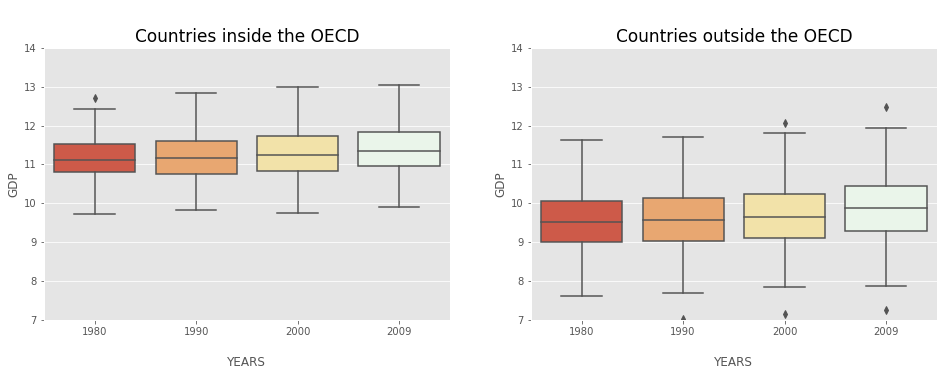

In [41]:
#Let's set the size of the figures:
fig = plt.figure(figsize=(16, 5))
plt.subplot(121)
#Providing the dataframe we will use for the Boxplot:
ax_gdp = sns.boxplot(data = np.log10(GDP_in.iloc[:,[1,2,3,4]]))
#Providing the characteristics of the graph:
plt.title("\nCountries inside the OECD",size=17)
plt.ylabel('GDP')
plt.xlabel('\nYEARS')
ax_gdp.set(ylim=(7,14))

plt.subplot(122)
#Providing the dataframe we will use for the Boxplot:
ax_gdp_1 = sns.boxplot(data = np.log10(GDP_out.iloc[:,[1,2,3,4]]))
#Providing the characteristics of the graph:
plt.title("\nCountries outside the OECD",size=17)
plt.ylabel('GDP')
plt.xlabel('\nYEARS')
ax_gdp_1.set(ylim=(7,14))
plt.show()

Through the analysis of these boxplots, we can conclude that indeed the countries within the **OECD** had higher growth than the countries in the other group. Additionally, there was an increase in the number of countries in their third quartile in 2009, indicating an improvement in their distribution. On the other hand, countries outside the **OECD** grew almost steadily, with little change in their quartiles.

___

...
<br>

#### 2.3 Analyzing Foreign Investments:



In [42]:
#Creating a dataframe with the Foreign Investments data obtained from countries within the Organization:
Investment_in = Foreign_investment_years.drop(Foreign_investment_years.loc[
                                                Foreign_investment_years['OECD'] == "OUT"].index)

In [43]:
#Creating a dataframe with the Foreign Investments data obtained from countries outside the Organization:
Investment_out = Foreign_investment_years.drop(Foreign_investment_years.loc[
                                                Foreign_investment_years['OECD'] == "IN"].index)

...

Let's quickly go through the characteristics of the investments:

In [46]:
#Let's check how the growth was for countries that are not part of the organization:
print("Countries outside the OECD:")
Investment_out.describe().round(3).loc[['count', 'mean', 'std', 'min' , 'max']]

Countries outside the OECD:


,1980,1990,2000,2009
count,91.000,115.000,141.000,150.000
mean,1.574,2.182,4.034,5.033
std,3.642,6.636,10.108,5.190
min,-13.600,-19.800,-16.600,-2.410
max,21.100,58.600,113.000,37.200


In [47]:
#Let's check how the growth was for countries that are part of the organization:
print("Countries within the OECD:")
Investment_in.describe().round(3).loc[['count', 'mean', 'std', 'min' , 'max']]

Countries within the OECD:


,1980,1990,2000,2009
count,25.000,27.000,33.000,35.000
mean,0.619,1.296,6.275,4.585
std,0.591,1.137,5.983,9.966
min,0.009,0.057,-2.870,-3.510
max,2.120,3.810,25.500,53.100


It is possible to notice that investments were scarcer at the beginning of the organization, but over the years, the scenario changed for the members, who started to have a higher maximum investment value than the value for countries outside the group.

___

### 3. Correlations between variables:

...

<br>

#### Let's correlate the per capita GDP data with the HDI data:

As seen in the exploratory analysis, both show higher growth for countries belonging to the **`OECD`**, but what about their correlation?

In [48]:
#Creating dataframes to perform the correlation:

#1990 - out
_IDH90_out = pd.DataFrame(HDI_out.iloc[:,2])
_GDP90_out = pd.DataFrame(GDP_out.iloc[:,2])
corr_out90 = _IDH90_out[1990].corr(_GDP90_out[1990])

#2000 - out
_IDH00_out = pd.DataFrame(HDI_out.iloc[:,3])
_GDP00_out = pd.DataFrame(GDP_out.iloc[:,3])
corr_out00 = _IDH00_out[2000].corr(_GDP00_out[2000])

#2009 - out
_IDH09_out = pd.DataFrame(HDI_out.iloc[:,4])
_GDP09_out = pd.DataFrame(GDP_out.iloc[:,4])
corr_out09 = _IDH09_out[2009].corr(_GDP09_out[2009])

#1990 - in
_IDH90_in = pd.DataFrame(HDI_in.iloc[:,2])
_GDP90_in = pd.DataFrame(GDP_in.iloc[:,2])
corr_in90 = _IDH90_in[1990].corr(_GDP90_in[1990])

#2000 - in
_IDH00_in = pd.DataFrame(HDI_in.iloc[:,3])
_GDP00_in = pd.DataFrame(GDP_in.iloc[:,3])
corr_in00 = _IDH00_in[2000].corr(_GDP00_in[2000])

#2009 - in
_IDH09_in = pd.DataFrame(HDI_in.iloc[:,4])
_GDP09_in = pd.DataFrame(GDP_in.iloc[:,4])
corr_in09 = _IDH09_in[2009].corr(_GDP09_in[2009])

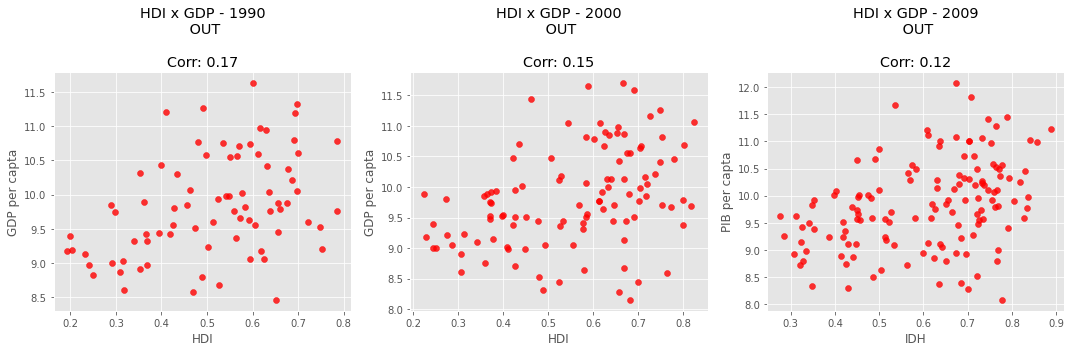

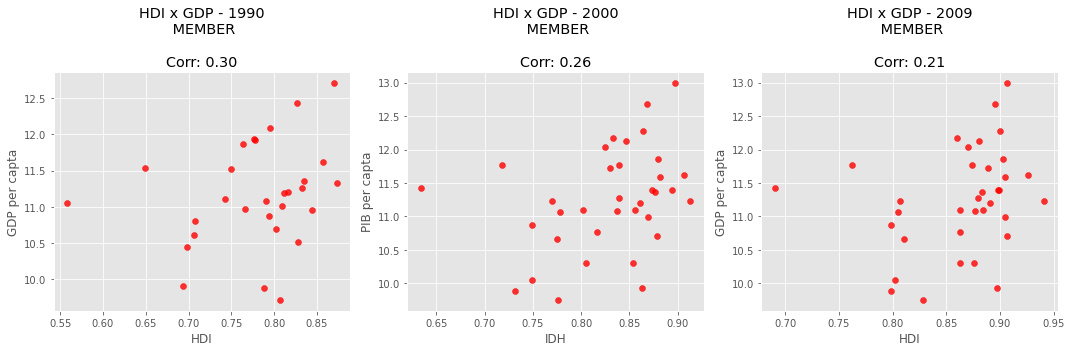

In [49]:
#Let's set the size of the figures:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
#Defining the data we are going to relate:
plt.scatter(HDI_out.iloc[:,2], np.log10(GDP_out.iloc[:,1]), c='red', alpha=0.8)
plt.title("HDI x GDP - 1990\n OUT\n\nCorr: {:.2f}".format(corr_out90))
plt.xlabel('HDI')
plt.ylabel('GDP per capta')

plt.subplot(132)
plt.scatter(HDI_out.iloc[:,3], np.log10(GDP_out.iloc[:,2]), c='red', alpha=0.8)
plt.title("HDI x GDP - 2000\n OUT\n\nCorr: {:.2f}".format(corr_out00))
plt.xlabel('HDI')
plt.ylabel('GDP per capta')

plt.subplot(133)
plt.scatter(HDI_out.iloc[:,4], np.log10(GDP_out.iloc[:,3]), c='red', alpha=0.8)
plt.title("HDI x GDP - 2009\n OUT\n\nCorr: {:.2f}".format(corr_out09))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(HDI_in.iloc[:,2], np.log10(GDP_in.iloc[:,1]), c='red', alpha=0.8)
plt.title("HDI x GDP - 1990\n MEMBER\n\nCorr: {:.2f}".format(corr_in90))
plt.xlabel('HDI')
plt.ylabel('GDP per capta')

plt.subplot(132)
plt.scatter(HDI_in.iloc[:,3], np.log10(GDP_in.iloc[:,3]), c='red', alpha=0.8)
plt.title("HDI x GDP - 2000\n MEMBER\n\nCorr: {:.2f}".format(corr_in00))
plt.xlabel('IDH')
plt.ylabel('PIB per capta')

plt.subplot(133)
plt.scatter(HDI_in.iloc[:,4], np.log10(GDP_in.iloc[:,3]), c='red', alpha=0.8)
plt.title("HDI x GDP - 2009\n MEMBER\n\nCorr: {:.2f}".format(corr_in09))
plt.xlabel('HDI')
plt.ylabel('GDP per capta')
plt.tight_layout()
plt.show()

It is possible to state that the countries in the chosen organization have their data closer and with a higher correlation than the countries outside the same organization.

...
<br>

#### Let's check more details for each relationship in all years:



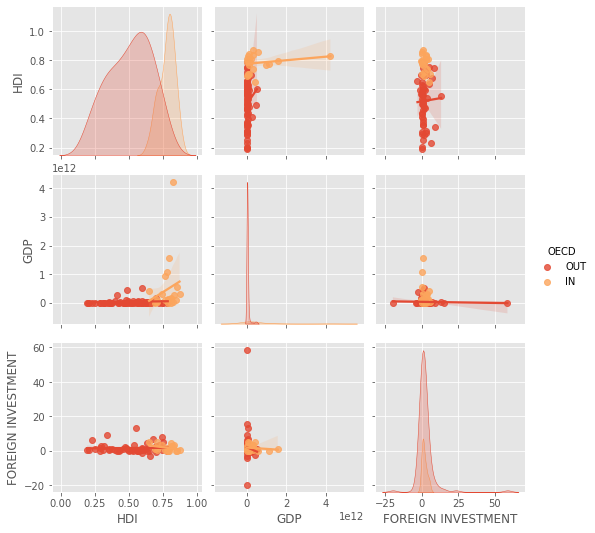

In [50]:
#Plotting correlation graphs between the variables used in 1990:"
sns.pairplot(df_1990, height = 2.5, hue = 'OECD', kind="reg");

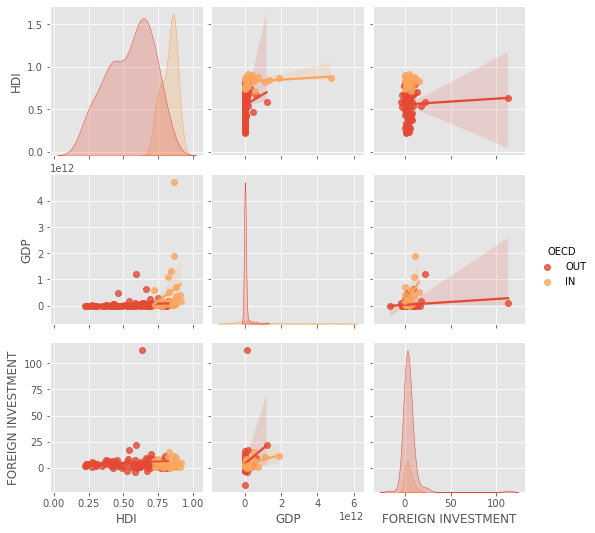

In [51]:
#Plotting correlation graphs between the variables used in 2000:
sns.pairplot(df_2000, height = 2.5, hue = 'OECD', kind="reg");

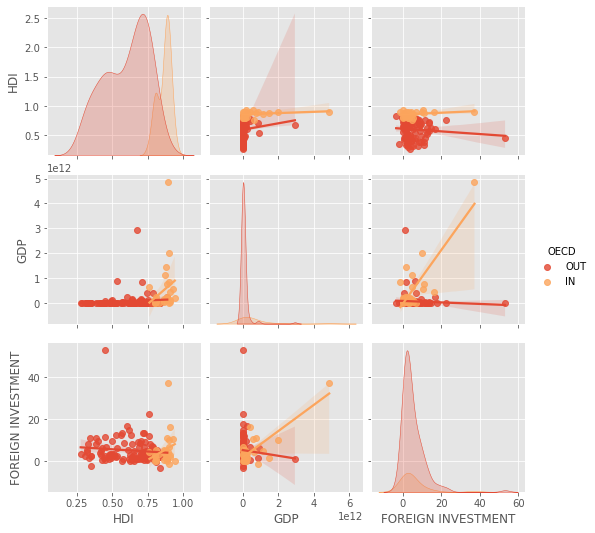

In [52]:
#Plotting correlation graphs between the variables used in 2009:
sns.pairplot(df_2009, height = 2.5, hue = 'OECD', kind="reg");

...
<br>

#### Now let's see it numerically:

In [53]:
#Creating a dataframes with the Foreign Direct Investment data:
df_1990_in = df_1990.drop(df_1990.loc[df_1990['OECD'] == "FORA"].index)
df_1990_out = df_1990.drop(df_1990.loc[df_1990['OECD'] == "DENTRO"].index)

df_2000_in = df_2000.drop(df_2000.loc[df_2000['OECD'] == "FORA"].index)
df_2000_out = df_2000.drop(df_2000.loc[df_2000['OECD'] == "DENTRO"].index)

df_2009_in = df_2009.drop(df_2009.loc[df_2009['OECD'] == "FORA"].index)
df_2009_out = df_2009.drop(df_2009.loc[df_2009['OECD'] == "DENTRO"].index)

In [54]:
#Creating lists with the correlation values for each year:
corr_invest_1990_in = ["1990",df_1990_in["HDI"].corr(df_1990_in["FOREIGN INVESTMENT"]),
                    df_1990_in["GDP"].corr(df_1990_in["FOREIGN INVESTMENT"]),]
corr_invest_2000_in = ["2000",df_2000_in["HDI"].corr(df_2000_in["FOREIGN INVESTMENT"]),
                    df_2000_in["GDP"].corr(df_2000_in["FOREIGN INVESTMENT"]),]
corr_invest_2009_in = ["2009",df_2009_in["HDI"].corr(df_2009_in["FOREIGN INVESTMENT"]),
                    df_2009_in["GDP"].corr(df_2009_in["FOREIGN INVESTMENT"]),]

corr_invest_1990_out = ["1990",df_1990_out["HDI"].corr(df_1990_out["FOREIGN INVESTMENT"]),
                    df_1990_out["GDP"].corr(df_1990_out["FOREIGN INVESTMENT"]),]
corr_invest_2000_out = ["2000",df_2000_out["HDI"].corr(df_2000_out["FOREIGN INVESTMENT"]),
                    df_2000_out["GDP"].corr(df_2000_out["FOREIGN INVESTMENT"]),]
corr_invest_2009_out = ["2009",df_2009_out["HDI"].corr(df_2009_out["FOREIGN INVESTMENT"]),
                    df_2009_out["GDP"].corr(df_2009_out["FOREIGN INVESTMENT"]),]

...
<br>

#### Correlation data for foreign direct investment with countries inside and outside the OECD:

The tables below show the respective correlations for each year with foreign direct investment, marked as HDI or GDP.

In [55]:
#Assigning values to the list with all the data:
invest_corr_in = [corr_invest_1990_in, corr_invest_2000_in, corr_invest_2009_in]
#Changing our list into a dataframe and assigning column names:
invest_corr_in_0 = pd.DataFrame(invest_corr_in, columns=["FOREIGN INVESTMENT x MEMBER", "HDI", "GDP"])
#Changing the index to FOREIGN INVESTMENT:
invest_corr_in_1 = invest_corr_in_0.set_index('FOREIGN INVESTMENT x MEMBER')
#Plotting the dataframe:
invest_corr_in_1

,HDI,GDP
FOREIGN INVESTMENT x MEMBER,,
1990,0.014836,-0.046271
2000,0.028734,0.153351
2009,-0.053363,0.296127


In [56]:
#Assigning values to the list with all the data:
invest_corr_out = [corr_invest_1990_out, corr_invest_2000_out, corr_invest_2009_out]
#Changing our list into a dataframe and assigning column names:
invest_corr_out_0 = pd.DataFrame(invest_corr_out, columns=["FOREIGN INVESTMENT x OUT", "HDI", "GDP"])
#Changing the index to FOREIGN INVESTMENT:
invest_corr_out_1 = invest_corr_out_0.set_index('FOREIGN INVESTMENT x OUT')
#Plotting the dataframe:
invest_corr_out_1

,HDI,GDP
FOREIGN INVESTMENT x OUT,,
1990,0.014836,-0.046271
2000,0.028734,0.153351
2009,-0.053363,0.296127


____

### 4. Conclusion:
<br>

After the exploratory analysis and a study on the correlations of variables over the years, we can conclude that the association of the 35 **OECD** members can indeed be related to a higher growth in HDI and GDP (evaluated with market value), as evidenced by the increase in averages, which is higher than that of the non-member group, as well as the decrease in standard deviation when analyzing HDI. The information obtained about GDP does not deviate much from the conclusions we have already made for HDI, and one of the biggest changes is in the tail distribution, which started to approach a normal distribution. Besides all of this, we can also see that, especially in 2009, there is a significant influence of foreign investments on HDI growth, with a correlation of approximately 0.81, and in the non-member group, the correlation is approximately -0.06. Therefore, we can assume that such superiority in investments with GDP growth may be related to an image of financial stability, which is conveyed by belonging to the **OECD**.

## References:

- https://www.gapminder.org/data/ <br>

- http://oecdobserver.org/news/archivestory.php/aid/2756/OECD_Model_Tax_Convention.html <br>

- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.595.9257&rep=rep1&type=pdf<br>

- http://www.gresea.be/OECD-Guidelines-its-pros-and-cons <br>

- http://worldpopulationreview.com/countries/oecd-countries/<br>

### Curiosity:

- A OECD is also called the 'Rich Man's Club' because the 35 participating countries together produce more than half of all the wealth in the world.